# Question 1: Delivery_time -> Predict delivery time using sorting time

In [1]:
#All the necessay imports 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
#loading the data 
data=pd.read_csv("delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Performing the EDA and Data Visualization


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
data.shape

(21, 2)

In [6]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
data.dropna()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


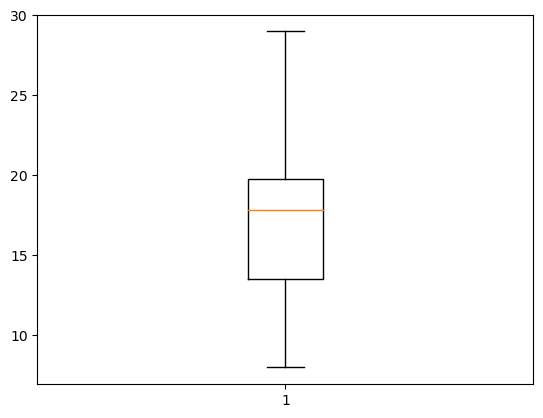

In [8]:
plt.boxplot(data["Delivery Time"])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

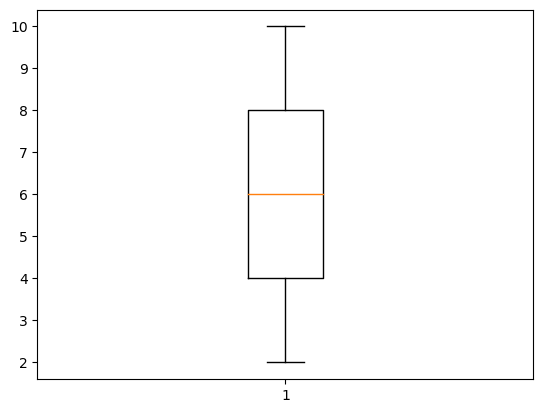

In [9]:
plt.boxplot(data["Sorting Time"])
plt.show

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

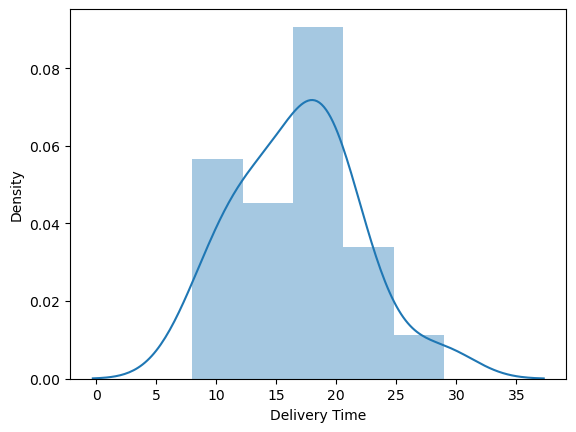

In [10]:
import warnings 
warnings.filterwarnings('ignore')
sns.distplot(data["Delivery Time"])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

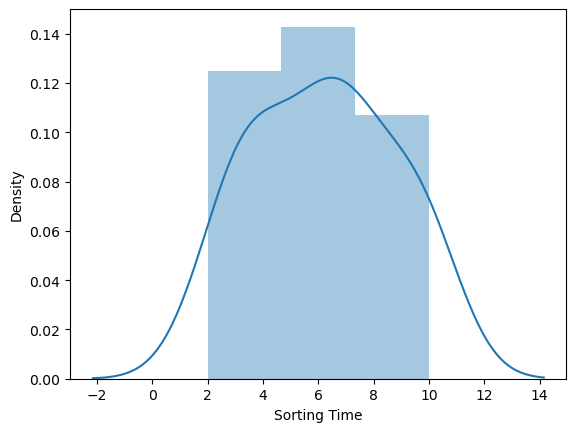

In [11]:
sns.distplot(data["Sorting Time"])

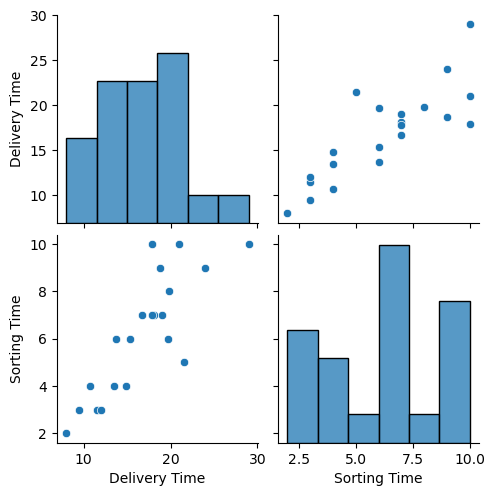

In [12]:
sns.pairplot(data)

In [13]:
data=data.rename({"Delivery Time":"Delivery_Time","Sorting Time":"Sorting_Time"},axis=1)
data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [14]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

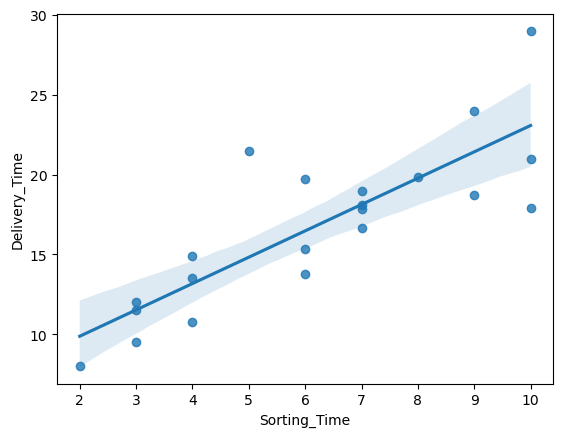

In [15]:
sns.regplot(x=data["Sorting_Time"],y=data["Delivery_Time"])

# Model Building

In [17]:
import statsmodels.formula.api as smf
model=smf.ols("Delivery_Time~Sorting_Time",data=data).fit()
print(model.params)

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64


In [18]:
model.tvalues

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64

In [19]:
model.pvalues

Intercept       0.001147
Sorting_Time    0.000004
dtype: float64

In [20]:
# R squared values
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        00:54:34   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model1 = smf.ols("np.log(Delivery_Time)~np.log(Sorting_Time)",data = data).fit()  
#using log


In [27]:
model1.params


Intercept               1.741987
np.log(Sorting_Time)    0.597522
dtype: float64

In [24]:
model1.tvalues

Intercept               13.085552
np.log(Sorting_Time)     8.024484
dtype: float64

In [26]:
model1.pvalues

Intercept               5.921137e-11
np.log(Sorting_Time)    1.601539e-07
dtype: float64

In [28]:
model1.rsquared,model1.rsquared_adj

(0.77216134926874, 0.7601698413355158)

In [29]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Thu, 16 Feb 2023   Prob (F-statistic):           1.60e-07
Time:                           00:58:16   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
model2=smf.ols("Delivery_Time~np.square(Sorting_Time)",data=data).fit()
model2.params

Intercept                  11.237205
np.square(Sorting_Time)     0.124870
dtype: float64

In [31]:
model2.tvalues

Intercept                  9.398601
np.square(Sorting_Time)    5.691330
dtype: float64

In [32]:
model2.pvalues

Intercept                  1.415704e-08
np.square(Sorting_Time)    1.739194e-05
dtype: float64

In [33]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           1.74e-05
Time:                        00:59:39   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  11.2372      1.196      9.399      0.000       8.735      13.740
np.square(Sorting_Time)     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
model3=smf.ols("Delivery_Time~np.sqrt(Sorting_Time)",data=data).fit()
model3.params

Intercept               -2.518837
np.sqrt(Sorting_Time)    7.936591
dtype: float64

In [35]:
model3.pvalues

Intercept                0.410857
np.sqrt(Sorting_Time)    0.000003
dtype: float64

In [36]:
model3.tvalues

Intercept               -0.840911
np.sqrt(Sorting_Time)    6.592434
dtype: float64

In [37]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           2.61e-06
Time:                        01:00:48   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(Sorting_Time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""